In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("Assignment 4_Remedial.csv")
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [10]:
# number one
data['KidneyDisease'] = data['KidneyDisease'].replace({'Yes': 1, 'No': 0})
correlation = data['BMI'].corr(data['KidneyDisease'])
print(f"Correlation between BMI and Kidney Disease: {correlation}")

Correlation between BMI and Kidney Disease: 0.05076753286252828


C:\Users\kemba\AppData\Local\Temp\ipykernel_612\624551747.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['KidneyDisease'] = data['KidneyDisease'].replace({'Yes': 1, 'No': 0})


meaning that the linear relationship between BMI and Kidney Disease is very weak as the correlation is close to zero

In [11]:
from scipy.stats import chi2_contingency

# Create a contingency table for AgeCategory and Kidney Disease
contingency_table = pd.crosstab(data['AgeCategory'], data['KidneyDisease'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")


if p < 0.05:
    print("AgeCategory is a key indicator of Kidney Disease.")
else:
    print("AgeCategory is not a key indicator of Kidney Disease.")

Chi-Square Statistic: 5198.26259786746, p-value: 0.0
AgeCategory is a key indicator of Kidney Disease.


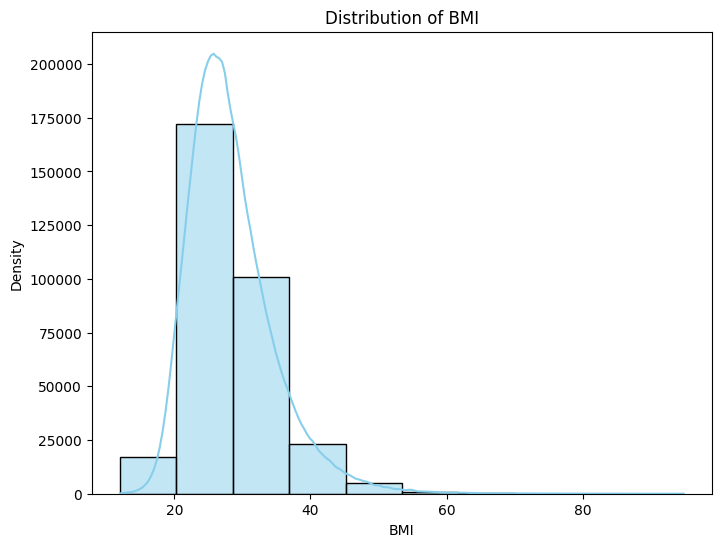

In [12]:
#number two
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.figure(figsize=(8, 6))
sns.histplot(data['BMI'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

In [13]:
mean_bmi = data['BMI'].mean()
median_bmi = data['BMI'].median()
std_bmi = data['BMI'].std()

In [14]:
print(f"Mean BMI: {mean_bmi}")
print(f"Median BMI: {median_bmi}")
print(f"Standard Deviation of BMI: {std_bmi}")

Mean BMI: 28.325398520927465
Median BMI: 27.34
Standard Deviation of BMI: 6.356100200470739


A mean of 28.33 suggests that, on average, individuals in your dataset fall into the overweight category.
A median of 27.34 being slightly lower than the mean indicates that the distribution might be right-skewed. 
With a standard deviation of 6.36, we can say that there’s a significant spread in the BMI values across the dataset


In [16]:
#number 3
total_people = len(data)
smokers = len(data[data['Smoking'] == 'Yes'])
P_smoker = smokers / total_people


In [19]:
smokers_with_skin_cancer = len(data[(data['Smoking'] == 'Yes') & (data['SkinCancer'] == 'Yes')])
P_skin_cancer_and_smoker = smokers_with_skin_cancer / total_people


In [20]:
print(f"Probability that a person who smokes has Skin Cancer: {P_skin_cancer_and_smoker}")

Probability that a person who smokes has Skin Cancer: 0.043324629840991884


In [21]:
#number 4
ContinuousVariables = ['BMI', 'SleepTime']
CorrelationData=data[ContinuousVariables].corr()
CorrelationData

,BMI,SleepTime
BMI,1.000000,-0.051822
SleepTime,-0.051822,1.000000


There is a very low negative correlation between BMI and SleepTime

<Axes: title={'center': 'Relationship between BMI and SleepTime'}, xlabel='BMI', ylabel='SleepTime'>

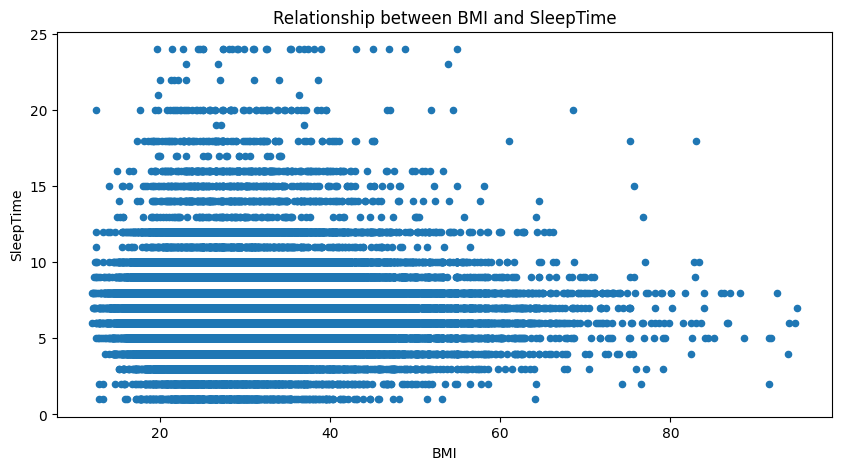

In [22]:
data.plot.scatter(x='BMI', y='SleepTime', figsize=(10,5), title='Relationship between BMI and SleepTime')

In [23]:
#number 5
contingency_table = pd.crosstab(data['GenHealth'], data['HeartDisease'], margins=True, margins_name="Total")
print("Contingency Table:")
print(contingency_table)

Contingency Table:
HeartDisease      No    Yes   Total
GenHealth                          
Excellent      65342   1500   66842
Fair           27593   7084   34677
Good           83571   9558   93129
Poor            7439   3850   11289
Very good     108477   5381  113858
Total         292422  27373  319795


In [24]:
contingency_table_percentage = contingency_table.div(contingency_table['Total'], axis=0) * 100
print("\nPercentage of Heart Disease by GenHealth:")
print(contingency_table_percentage)



Percentage of Heart Disease by GenHealth:
HeartDisease         No        Yes  Total
GenHealth                                
Excellent     97.755902   2.244098  100.0
Fair          79.571474  20.428526  100.0
Good          89.736817  10.263183  100.0
Poor          65.896005  34.103995  100.0
Very good     95.273938   4.726062  100.0
Total         91.440454   8.559546  100.0


C:\Users\kemba\AppData\Local\Temp\ipykernel_612\3488421172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contingency_table_percentage.index, y=contingency_table_percentage['Yes'], palette='viridis')


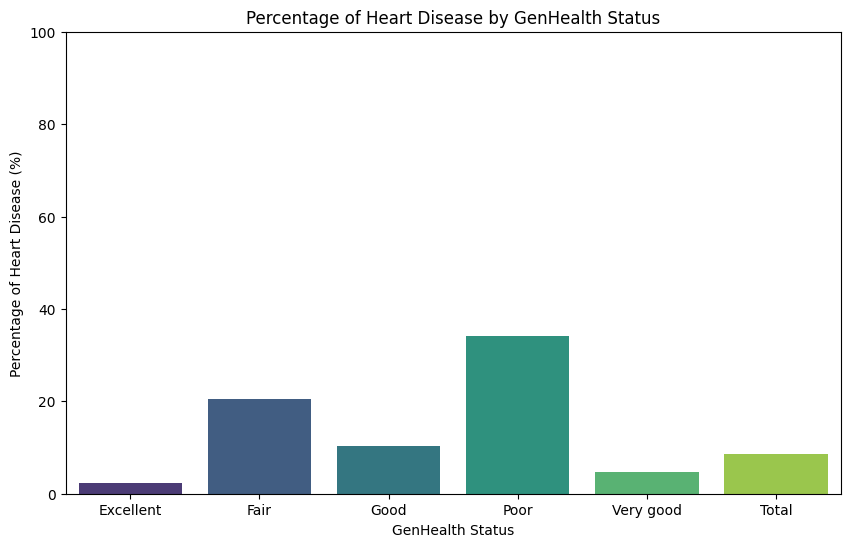

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=contingency_table_percentage.index, y=contingency_table_percentage['Yes'], palette='viridis')
plt.title('Percentage of Heart Disease by GenHealth Status')
plt.xlabel('GenHealth Status')
plt.ylabel('Percentage of Heart Disease (%)')
plt.ylim(0, 100)
plt.show()

In [26]:
min_genhealth_status = contingency_table_percentage['Yes'].idxmin()
min_percentage = contingency_table_percentage['Yes'].min()

print(f"\nAdvice: Patients should maintain a GenHealth status of '{min_genhealth_status}' to minimize the risk of Heart Disease, with only {min_percentage:.2f}% prevalence.")


Advice: Patients should maintain a GenHealth status of 'Excellent' to minimize the risk of Heart Disease, with only 2.24% prevalence.
